# Series de Tiempo

In [219]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt

## Tipos de datos para el manejo del tiempo

In [103]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2023, 4, 27, 14, 34, 24, 962610)

In [104]:

now.year, now.month, now.day

(2023, 4, 27)

In [105]:
now.minute

34

In [106]:
datetime.utcnow()

datetime.datetime(2023, 4, 27, 14, 34, 25, 43601)

In [107]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [108]:
delta.days

926

In [109]:
delta.seconds

56700

In [110]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start

datetime.datetime(2011, 1, 7, 0, 0)

In [111]:
start + timedelta(weeks=40)

datetime.datetime(2011, 10, 14, 0, 0)

In [112]:
start + 2 * timedelta(weeks=4)

datetime.datetime(2011, 3, 4, 0, 0)

### Conversión de texto a Datetime

In [113]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [114]:

stamp.strftime('%A %d %m %Y')

'Monday 03 01 2011'

In [115]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [116]:

datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [117]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [118]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [119]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [120]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
mi_indice = pd.to_datetime(datestrs)
mi_indice

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [121]:
pd.DataFrame(['juanito', 'carlitos'], index=mi_indice, columns=['amigos'])

amigos
2011-07-06 12:00:00   juanito
2011-08-06 00:00:00  carlitos

In [122]:
pd.Series(['coco', 'pera'], index=mi_indice)

2011-07-06 12:00:00    coco
2011-08-06 00:00:00    pera
dtype: object

In [123]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [124]:
idx[2]

NaT

In [125]:
pd.isnull(idx)

array([False, False,  True])

## Introducción a la series de tiempo

In [126]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [127]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [128]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [129]:
ts.index.dtype

dtype('<M8[ns]')

In [130]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [131]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [132]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [133]:
ts['1/10/2011']

1.9657805725027142

In [134]:
ts['20110110']

1.9657805725027142

In [135]:
ts['2011-01-07']

-0.5194387150567381

In [136]:
pd.date_range('7/1/2021', periods=25, freq='1h30min')

DatetimeIndex(['2021-07-01 00:00:00', '2021-07-01 01:30:00',
               '2021-07-01 03:00:00', '2021-07-01 04:30:00',
               '2021-07-01 06:00:00', '2021-07-01 07:30:00',
               '2021-07-01 09:00:00', '2021-07-01 10:30:00',
               '2021-07-01 12:00:00', '2021-07-01 13:30:00',
               '2021-07-01 15:00:00', '2021-07-01 16:30:00',
               '2021-07-01 18:00:00', '2021-07-01 19:30:00',
               '2021-07-01 21:00:00', '2021-07-01 22:30:00',
               '2021-07-02 00:00:00', '2021-07-02 01:30:00',
               '2021-07-02 03:00:00', '2021-07-02 04:30:00',
               '2021-07-02 06:00:00', '2021-07-02 07:30:00',
               '2021-07-02 09:00:00', '2021-07-02 10:30:00',
               '2021-07-02 12:00:00'],
              dtype='datetime64[ns]', freq='90T')

In [137]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [138]:
longer_ts['2020':]

Series([], Freq: D, dtype: float64)

In [139]:
longer_ts['2001-02']

2001-02-01   -0.010115
2001-02-02    1.415753
2001-02-03    0.566106
2001-02-04    0.456487
2001-02-05    0.194788
                ...   
2001-02-24    1.288306
2001-02-25    0.851814
2001-02-26   -1.529181
2001-02-27   -1.551715
2001-02-28    0.297293
Freq: D, Length: 28, dtype: float64

In [140]:
ts[datetime(2020, 1, 7):]

Series([], dtype: float64)

In [141]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [142]:

ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [143]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [144]:
ts.truncate(before='1/9/2011')

2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

# Caso de uso

In [145]:
dates = pd.date_range(start='1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df

Colorado     Texas  New York      Ohio
2000-01-05  0.488675 -0.178098  2.122315  0.061192
2000-01-12  0.884111 -0.608506 -0.072052  0.544066
2000-01-19  0.323886 -1.683325  0.526860  1.858791
2000-01-26 -0.548419 -0.279397 -0.021299 -0.287990
2000-02-02  0.089175  0.522858  0.572796 -1.760372
...              ...       ...       ...       ...
2001-10-31 -0.054630 -0.656506 -1.550087 -0.044347
2001-11-07  0.681470 -0.953726 -1.857016  0.449495
2001-11-14 -0.061732  1.233914  0.705830 -1.309077
2001-11-21 -1.537380  0.531551  2.047573  0.446691
2001-11-28 -0.223556  0.092835  0.716076  0.657198

[100 rows x 4 columns]

In [146]:
long_df.loc['2001-10': '2001-11']

Colorado     Texas  New York      Ohio
2001-10-03  1.527070  0.287542  0.715359 -0.345805
2001-10-10  0.470886 -1.121515 -1.544365  1.720513
2001-10-17 -0.171724 -0.827840  0.370548 -0.674167
2001-10-24 -1.712340 -0.738151  0.391813  1.763403
2001-10-31 -0.054630 -0.656506 -1.550087 -0.044347
2001-11-07  0.681470 -0.953726 -1.857016  0.449495
2001-11-14 -0.061732  1.233914  0.705830 -1.309077
2001-11-21 -1.537380  0.531551  2.047573  0.446691
2001-11-28 -0.223556  0.092835  0.716076  0.657198

In [147]:
# ejercicio 
# tengo un df que tenga una columna con fechas
# filtrar los datos por un mes en específico

### Series de Tiempo y duplicaciones

In [148]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [149]:
dup_ts.index.is_unique

False

In [150]:
dup_ts['1/3/2000']  # not duplicated
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [151]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [152]:
ts
resampler = ts.resample('D')

### Rangos de fechas

In [153]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [154]:
pd.date_range(start='2012-04-01', periods=20)
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [155]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [156]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [157]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [160]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [162]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Fecha de semanas del mes

In [163]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Corrimientos de fechas

In [221]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts
ts.shift(2)
ts.shift(-2)

2000-01-31   -0.519439
2000-02-29   -0.555730
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [223]:
# Tasa de variación
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -3.339645
2000-03-31   -2.084551
2000-04-30    0.069867
Freq: M, dtype: float64

In [165]:
ts.shift(2, freq='M')

2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

In [224]:
ts.shift(3, freq='D')

2000-02-03   -0.204708
2000-03-03    0.478943
2000-04-03   -0.519439
2000-05-03   -0.555730
dtype: float64

In [225]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.204708
2000-02-29 01:30:00    0.478943
2000-03-31 01:30:00   -0.519439
2000-04-30 01:30:00   -0.555730
dtype: float64

#### Corrimiento de fechas usando offsets

In [167]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [168]:
now + MonthEnd()
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [169]:
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [226]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts


2000-01-15    1.965781
2000-01-19    1.393406
2000-01-23    0.092908
2000-01-27    0.281746
2000-01-31    0.769023
2000-02-04    1.246435
2000-02-08    1.007189
2000-02-12   -1.296221
2000-02-16    0.274992
2000-02-20    0.228913
2000-02-24    1.352917
2000-02-28    0.886429
2000-03-03   -2.001637
2000-03-07   -0.371843
2000-03-11    1.669025
2000-03-15   -0.438570
2000-03-19   -0.539741
2000-03-23    0.476985
2000-03-27    3.248944
2000-03-31   -1.021228
Freq: 4D, dtype: float64

In [227]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.900573
2000-02-29    0.528665
2000-03-31    0.127742
dtype: float64

In [228]:
ts.resample('M').mean()

2000-01-31    0.900573
2000-02-29    0.528665
2000-03-31    0.127742
Freq: M, dtype: float64

## Manejo de zona horaria

In [172]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [173]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [174]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [175]:
print(ts.index.tz)

None


In [176]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [177]:
ts
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [178]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.202469
2012-03-10 04:30:00-05:00    0.050718
2012-03-11 05:30:00-04:00    0.639869
2012-03-12 05:30:00-04:00    0.597594
2012-03-13 05:30:00-04:00   -0.797246
2012-03-14 05:30:00-04:00    0.472879
Freq: D, dtype: float64

In [179]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.202469
2012-03-10 15:30:00+01:00    0.050718
2012-03-11 14:30:00+01:00    0.639869
2012-03-12 14:30:00+01:00    0.597594
2012-03-13 14:30:00+01:00   -0.797246
2012-03-14 14:30:00+01:00    0.472879
dtype: float64

In [180]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with Time Zone−Aware Timestamp Objects

In [181]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [182]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [229]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [230]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [231]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [232]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [186]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Resampling and Frequency Conversion

In [235]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts


2000-01-01   -0.577087
2000-01-02    0.124121
2000-01-03    0.302614
2000-01-04    0.523772
2000-01-05    0.000940
                ...   
2000-04-05   -1.648985
2000-04-06   -2.252797
2000-04-07   -1.166832
2000-04-08    0.353607
2000-04-09    0.702110
Freq: D, Length: 100, dtype: float64

In [236]:
ts.resample('M').mean()

2000-01-31   -0.270497
2000-02-29   -0.183645
2000-03-31    0.205624
2000-04-30   -0.413276
Freq: M, dtype: float64

In [239]:
ts.resample('M', kind='period').mean()

2000-01   -0.270497
2000-02   -0.183645
2000-03    0.205624
2000-04   -0.413276
Freq: M, dtype: float64

In [238]:
ts.resample('M', kind='timestamp').mean()

2000-01-31   -0.270497
2000-02-29   -0.183645
2000-03-31    0.205624
2000-04-30   -0.413276
Freq: M, dtype: float64

### Downsampling

In [240]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [241]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [243]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [245]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

<ipython-input-245-b63ded3800c4>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right',


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

### Upsampling and Interpolation

In [246]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

Colorado     Texas  New York      Ohio
2000-01-05 -0.274569 -0.139142  0.107657 -0.606545
2000-01-12 -0.417064 -0.017007 -1.224145 -1.800840

In [247]:
df_daily = frame.resample('D').asfreq()
df_daily

Colorado     Texas  New York      Ohio
2000-01-05 -0.274569 -0.139142  0.107657 -0.606545
2000-01-06       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -0.417064 -0.017007 -1.224145 -1.800840

In [248]:
frame.resample('D').ffill()

Colorado     Texas  New York      Ohio
2000-01-05 -0.274569 -0.139142  0.107657 -0.606545
2000-01-06 -0.274569 -0.139142  0.107657 -0.606545
2000-01-07 -0.274569 -0.139142  0.107657 -0.606545
2000-01-08 -0.274569 -0.139142  0.107657 -0.606545
2000-01-09 -0.274569 -0.139142  0.107657 -0.606545
2000-01-10 -0.274569 -0.139142  0.107657 -0.606545
2000-01-11 -0.274569 -0.139142  0.107657 -0.606545
2000-01-12 -0.417064 -0.017007 -1.224145 -1.800840

In [249]:
frame.resample('D').ffill(limit=2)

Colorado     Texas  New York      Ohio
2000-01-05 -0.274569 -0.139142  0.107657 -0.606545
2000-01-06 -0.274569 -0.139142  0.107657 -0.606545
2000-01-07 -0.274569 -0.139142  0.107657 -0.606545
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -0.417064 -0.017007 -1.224145 -1.800840

In [250]:
frame.resample('W-THU').ffill()

Colorado     Texas  New York      Ohio
2000-01-06 -0.274569 -0.139142  0.107657 -0.606545
2000-01-13 -0.417064 -0.017007 -1.224145 -1.800840

### Resampling with Periods

In [199]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]
annual_frame = frame.resample('A-DEC').mean()
annual_frame

Colorado     Texas  New York      Ohio
2000  0.385785  0.274282 -0.317747  0.371342
2001  0.169607  0.171195 -0.299039  0.363118

In [200]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()
annual_frame.resample('Q-DEC', convention='end').ffill()

Colorado     Texas  New York      Ohio
2000Q4  0.385785  0.274282 -0.317747  0.371342
2001Q1  0.385785  0.274282 -0.317747  0.371342
2001Q2  0.385785  0.274282 -0.317747  0.371342
2001Q3  0.385785  0.274282 -0.317747  0.371342
2001Q4  0.169607  0.171195 -0.299039  0.363118

In [201]:
annual_frame.resample('Q-MAR').ffill()

Colorado     Texas  New York      Ohio
2000Q4  0.385785  0.274282 -0.317747  0.371342
2001Q1  0.385785  0.274282 -0.317747  0.371342
2001Q2  0.385785  0.274282 -0.317747  0.371342
2001Q3  0.385785  0.274282 -0.317747  0.371342
2001Q4  0.169607  0.171195 -0.299039  0.363118
2002Q1  0.169607  0.171195 -0.299039  0.363118
2002Q2  0.169607  0.171195 -0.299039  0.363118
2002Q3  0.169607  0.171195 -0.299039  0.363118

## Moving Window Functions

In [202]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

Se presenta al operador rolling, que se comporta de manera similar  al resample y al groupby. Se puede llamar en una serie o DataFrame junto con una window (expresada como un número de puntos;



<Axes: >

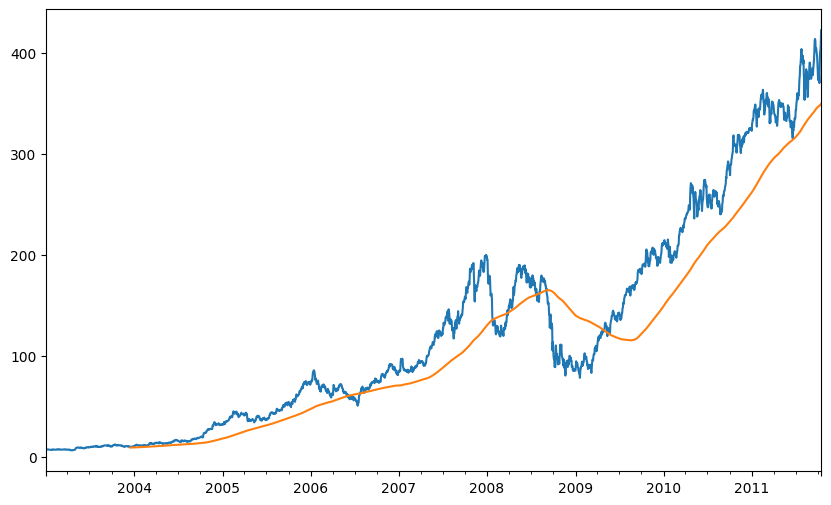

In [203]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [204]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

La expresión rolling(250)  es similar en comportamiento a groupby, pero en lugar de agrupar, crea un objeto que permite agrupar en una ventana deslizante de 250 días. Así que aquí tenemos el promedio de ventana móvil de 250 días del precio de las acciones de Apple.
De forma predeterminada, las funciones móviles requieren que todos los valores de la ventana no sean NA. Este comportamiento se puede cambiar para tener en cuenta los datos que faltan y, en particular, el hecho de que tendrá menos de períodos de ventana de datos al principio de la serie temporal




<Axes: >

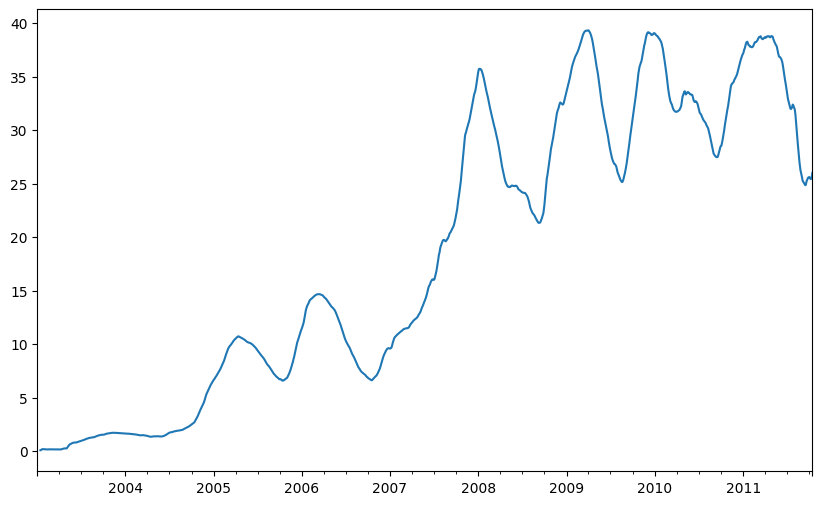

In [205]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

Para calcular una expanding window mean  use el  operador en expansión en lugar de rolling. La media en expansión inicia la ventana de tiempo desde el mismo punto que la ventana rodante y aumenta el tamaño de la ventana hasta que abarca toda la serie. Una ventana en expansión significa en la  serie temporal std250 se ve así.

In [206]:
expanding_mean = appl_std250.expanding().mean()

In [207]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

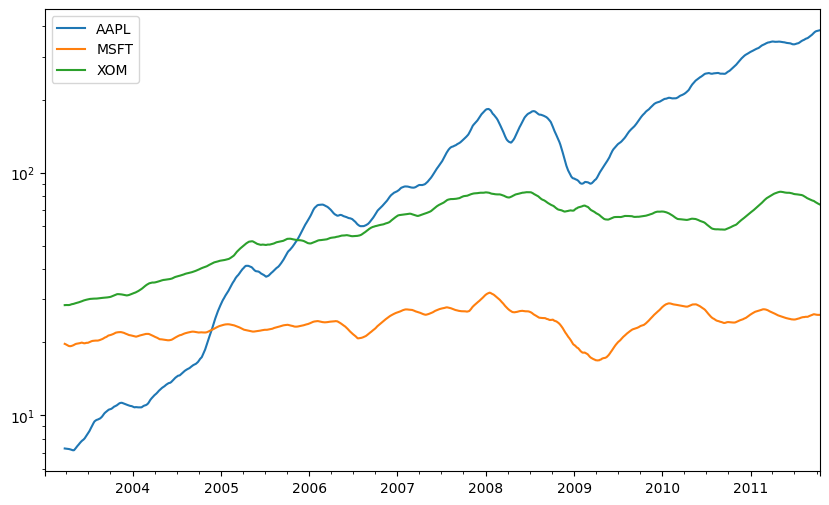

In [208]:
close_px.rolling(60).mean().plot(logy=True)

La función rolling también acepta una cadena que indica un desplazamiento de tiempo de tamaño fijo rolling() en funciones de ventana móvil en lugar de un número determinado de períodos. El uso de esta notación puede ser útil para series temporales irregulares. Estas son las mismas cadenas que puede pasar para volver a resample. Por ejemplo, podríamos calcular una media móvil de 20 días así:

In [209]:
close_px.rolling('20D').mean()

AAPL       MSFT        XOM
2003-01-02    7.400000  21.110000  29.220000
2003-01-03    7.425000  21.125000  29.230000
2003-01-06    7.433333  21.256667  29.473333
2003-01-07    7.432500  21.425000  29.342500
2003-01-08    7.402000  21.402000  29.240000
...                ...        ...        ...
2011-10-10  389.351429  25.602143  72.527857
2011-10-11  388.505000  25.674286  72.835000
2011-10-12  388.531429  25.810000  73.400714
2011-10-13  388.826429  25.961429  73.905000
2011-10-14  391.038000  26.048667  74.185333

[2292 rows x 3 columns]

### Exponentially Weighted Functions

In [210]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Una alternativa al uso de un tamaño de ventana fijo con observaciones igualmente ponderadas es especificar un factor de decaimiento constante  para dar más peso a las observaciones más recientes. 

Hay un par de maneras de especificar el factor de desintegración. Uno popular es usar  un span, lo que hace que el resultado sea comparable a una función de ventana móvil simple con un tamaño de ventana igual al span.

Dado que una estadística ponderada exponencialmente da más peso a las observaciones más recientes, se "adapta" más rápido a los cambios en comparación con la versión de igual ponderación.

Pandas tiene el operador EWM (que significa movimiento ponderado exponencialmente) para acompañar el rolling y la expanding. Aquí hay un ejemplo que compara un promedio móvil de 30 días del precio de las acciones de Apple con un promedio móvil ponderado exponencialmente (EW) con span = 60


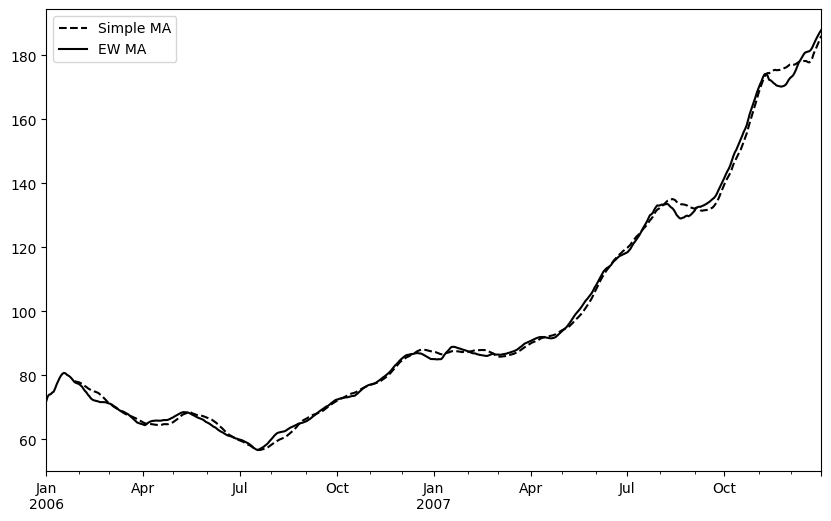

In [211]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()